# Análisis de datos


In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
from skimpy import skim
import sidetable
import matplotlib.pyplot as plt

In [2]:
data_train_xml_1 = ET.parse('TREC-2017-LiveQA-Medical-Train-1.xml')
root_1 = data_train_xml_1.getroot()

In [3]:
data_train_xml_2 = ET.parse('TREC-2017-LiveQA-Medical-Train-2.xml')
root_2 = data_train_xml_2.getroot()

data_train = []

In [4]:
for registro in root_1.findall('NLM-QUESTION'):
    subject = registro.find('SUBJECT').text 
    message = registro.find('MESSAGE').text 
    sub_question = registro.find('SUB-QUESTIONS').find('SUB-QUESTION')
    type_element = sub_question.find('ANNOTATIONS').find('TYPE').text 
    answer = sub_question.find('ANSWERS').find('ANSWER').text
    data_train.append({
        'message': message,
        'type': type_element,
        'answer': answer
    })

In [5]:
for registro in root_2.findall('NLM-QUESTION'):
    subject = registro.find('SUBJECT').text 
    message = registro.find('MESSAGE').text 
    sub_question = registro.find('SUB-QUESTIONS').find('SUB-QUESTION')
    type_element = sub_question.find('ANNOTATIONS').find('TYPE').text 
    answer = sub_question.find('ANSWERS').find('ANSWER').text
    data_train.append({
        'message': message,
        'type': type_element,
        'answer': answer
    })

In [6]:
df_questions = pd.DataFrame(data_train)

In [7]:
df_questions.sample(5)

,message,type,answer
147,I want more information on Hypertension and fi...,information,Blood pressure is a measurement of the force e...
382,"sir, with due respect I would like to state th...",Treatment,Home Care Follow your doctor's recommendation ...
152,I need to lose fat,treatment,CHANGING YOUR LIFESTYLE An active lifestyle ...
0,Literature on Cardiac amyloidosis. Please let...,information,Cardiac amyloidosis is a disorder caused by de...
95,"Achondroplasia research. Hello, We are studen...",diagnosis,Your doctor may diagnose your child with achon...


In [8]:
skim(df_questions)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 446    │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 3      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ message                   │       2 │       0.45 │                           45 │                    20121 │  │
│ │ type                      │       0 │          0 │                            1 │                      453 │  │
│ │ answer                    │       0 │          0 │                          150 │                    65772 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

- Hay que eliminar los 2 registros con message nulo porque puede dar problemas

In [9]:
df_questions = df_questions.dropna(subset=['message'])

In [10]:
df_questions.duplicated().any()

False

In [11]:
df_questions.stb.freq(['type'])

,type,count,percent,cumulative_count,cumulative_percent
0,Treatment,129,29.054054,129,29.054054
1,treatment,77,17.342342,206,46.396396
2,information,47,10.585586,253,56.981982
3,Information,31,6.981982,284,63.963964
4,Organization,17,3.828829,301,67.792793
5,cause,15,3.378378,316,71.171171
6,Cause,14,3.153153,330,74.324324
7,diagnosis,13,2.927928,343,77.252252
8,Susceptibility,13,2.927928,356,80.180180
9,Diagnosis,9,2.027027,365,82.207207


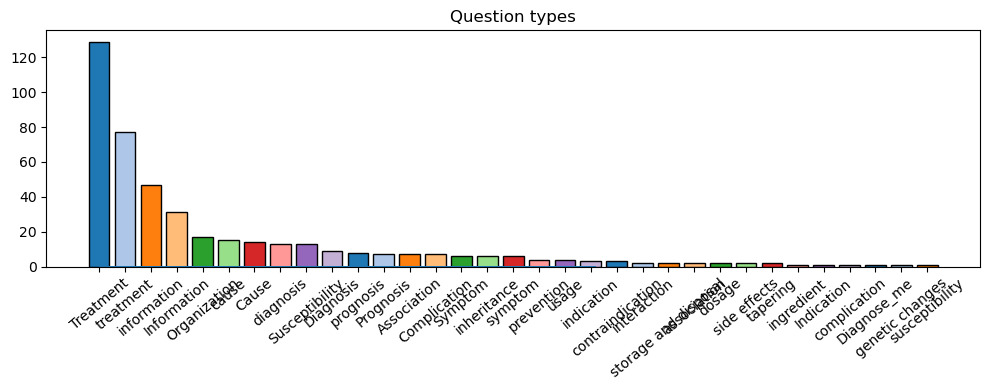

In [12]:
colors = plt.cm.tab20.colors 
fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.bar(df_questions['type'].value_counts().index, df_questions['type'].value_counts().values,color=colors[:10], edgecolor='black')

ax.hist(df_questions['type'], stacked=True, density=True)
ax.set_title("Question types")

#Mostrar el gráfico
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

- Los datos están muy desbalanceados. No obtante se va a optar por entrenar el modelo con los datos que se tienen.